Conceptual Question
Suppose you are classifying emails as Spam or Not Spam.
Feature 1: Presence of the word "Free".
Feature 2: Presence of the word "Offer".
Why is it okay for Naïve Bayes to assume these two features are independent, even though in reality they often appear together in spam emails?

Task:
Load the Iris dataset (or use sklearn’s make_classification).
Implement Gaussian Naïve Bayes from scratch (without GaussianNB).
compare accuracy
extra work-
Try the same exercise on a text dataset (e.g., spam detection with sklearn.datasets.fetch_20newsgroups), using MultinomialNB.

Answer: Naive Bayes assumes independence of features (like “Free” and “Offer”), even though in reality they aren’t truly independent.            
The Key Idea
Naive Bayes knows the assumption is false.
But the independence assumption makes the math simple and surprisingly still gives good results.

In [57]:
from sklearn.datasets import make_classification
#n_informative
#How many features are actually useful for classification.
#Example: n_informative=5 → 5 features carry real signal, others may be noise.
X,y=make_classification(n_samples=1000,n_features=10,n_classes=5,n_redundant=2,n_clusters_per_class=2,n_informative=5,random_state=42)

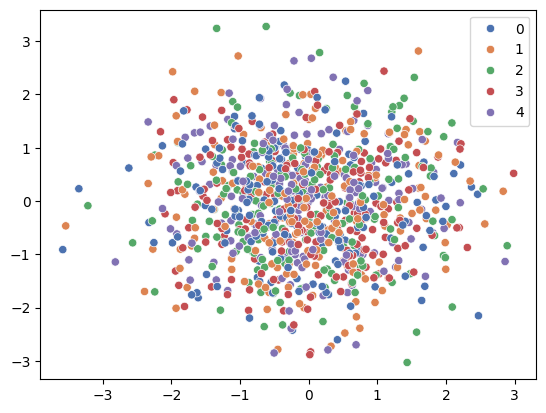

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="deep")
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
set(y_train)

{0, 1, 2, 3, 4}

In [ ]:
#to be done later with another dataset !
import numpy as np
from collections import defaultdict

class NaiveBayes:
    def __init__(self):
        self.class_counts = defaultdict(int)   
        self.feature_counts = defaultdict(int) 
        self.total_samples = 0
    
    def calculate_probability(self, feature_probs):
        """Multiply probabilities for one class"""
        ck = 1
        for p in feature_probs:
            ck *= p
        return ck
    
    def train_model(self, X_train, y_train):
        """Count class and feature occurrences"""
        self.total_samples = len(y_train)
        
        for x, label in zip(X_train, y_train):
            self.class_counts[label] += 1
            for idx, val in enumerate(x):   # count each feature with class
                self.feature_counts[(idx, val, label)] += 1
                
        self.priors = {cls: count/self.total_samples 
                       for cls, count in self.class_counts.items()}
        
        self.feature_priors={}
        print("Class Counts:", dict(self.class_counts))
        print("Feature+Class Counts:", dict(self.feature_counts))
        print("features+class probabilities :")
        print("Class Probabilities :", self.priors)


In [ ]:
obj=NaiveBayes()
obj.train_model(X_train,y_train)


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]